# Проект: Линейные модели в машинном обучении

## 1. Загрузка и изучение данных

### 1.1 Импорт библиотек

In [1]:
import pandas  as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats    

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   OneHotEncoder
                                  )
from sklearn.linear_model import (LinearRegression, 
                                  LogisticRegression
                                 )
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             mean_absolute_error, 
                             mean_squared_error,
                             precision_score,
                             recall_score,
                             r2_score
                            )

### 1.2 Чтение данных

In [2]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [3]:
try:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [4]:
try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### 1.3 Изучение данных

#### 1.3.1 Изучение DataFrame `ferma_main`

In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Таблица `ferma_main.csv` содержит следующие данные:
+ `id` — уникальный идентификатор коровы.
+ `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
+ `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
+ `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
+ `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
+ `Порода` — порода коровы.
+ `Тип пастбища` — ландшафт лугов, на которых паслась корова.
+ `порода папы_быка` — порода папы коровы.
+ `Жирность,%` — содержание жиров в молоке (в процентах).
+ `Белок,%` — содержание белков в молоке (в процентах).
+ `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
+ `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`)

В таблице пропуски отсутствуют.

In [6]:
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [7]:
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat_percent',
    'Белок,%': 'protein_percent',
    'Вкус молока': 'milk_flavor',
    'Возраст': 'age'
}, inplace=True)
ferma_main.columns

Index(['id', 'yield_kg', 'energy_feed_unit', 'crude_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'sire_breed',
       'fat_percent', 'protein_percent', 'milk_flavor', 'age'],
      dtype='object')

#### 1.3.2 Изучение DataFrame `ferma_dad`

In [8]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Таблица `ferma_dad.csv` содержит следующие данные:
+ `id` — уникальный идентификатор коровы.
+ `Имя Папы` — имя папы коровы

В таблице пропуски отсутствуют.

In [9]:
ferma_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [10]:
ferma_dad.rename(columns={
    'id': 'id',
    'Имя Папы': 'dad_name'
}, inplace=True)
ferma_dad.columns

Index(['id', 'dad_name'], dtype='object')

#### 1.3.3 Изучение DataFrame `cow_buy`

In [11]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Таблица `cow_buy.csv` содержит следующие данные:
+ `Порода` — порода коровы.
+ `Тип пастбища` — ландшафт лугов, на которых паслась корова.
+ `порода папы_быка` — порода папы коровы.
+ `Имя_папы` — имя папы коровы.
+ `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
+ `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
+ `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`)

В таблице пропуски отсутствуют, наименования столбцов приведем к наименованию таблицы `ferma_main`.

In [12]:
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [13]:
cow_buy.rename(columns={
    'Порода': 'breed', 
    'Тип пастбища': 'pasture_type', 
    'порода папы_быка': 'sire_breed', 
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_percent', 
    'Текущий_уровень_белок,%': 'protein_percent', 
    'Возраст': 'age'
}, inplace=True)
cow_buy.columns

Index(['breed', 'pasture_type', 'sire_breed', 'dad_name', 'fat_percent',
       'protein_percent', 'age'],
      dtype='object')

### 1.4 Вывод по изучению данных

1. Представленные данные соответствуют заявленным.
2. Пропуски в данных отсутствуют.
3. В таблицах произведена замена названий столбцов:

+ в DataFreme `ferma_main` 
    + 'id' - 'id',
    + 'Удой, кг' - 'yield_kg',
    + 'ЭКЕ (Энергетическая кормовая единица)' - 'energy_feed_unit',
    + 'Сырой протеин, г' - 'crude_protein_g',
    + 'СПО (Сахаро-протеиновое соотношение)' - 'sugar_protein_ratio',
    + 'Порода' - 'breed',
    + 'Тип пастбища' - 'pasture_type',
    + 'порода папы_быка' - 'sire_breed',
    + 'Жирность,%' - 'fat_percent',
    + 'Белок,%' - 'protein_percent',
    + 'Вкус молока' - 'milk_flavor',
    + 'Возраст' - 'age'
+ в DataFreme `dad_name` 
    + 'id' - 'id',
    + 'Имя Папы' - 'dad_name'
+ в DataFreme `cow_buy` 
    + 'Порода' - 'breed', 
    + 'Тип пастбища' - 'pasture_type', 
    + 'порода папы_быка' - 'sire_breed', 
    + 'Имя_папы' - 'dad_name',
    + 'Текущая_жирность,%' - 'fat_percent', 
    + 'Текущий_уровень_белок,%' - 'protein_percent', 
    + 'Возраст' - 'age'

##  2. Предобработка данных

### 2.1 Предобработка DataFrame `ferma_main`

In [14]:
ferma_main[ferma_main.duplicated()]

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [15]:
print('Явных дубликатов:', ferma_main.duplicated().sum())
ferma_main = ferma_main.drop_duplicates()
print('Явных дубликатов после удаления:', ferma_main.duplicated().sum())

Явных дубликатов: 5
Явных дубликатов после удаления: 0


In [16]:
ferma_main.dtypes

id                      int64
yield_kg                int64
energy_feed_unit       object
crude_protein_g         int64
sugar_protein_ratio    object
breed                  object
pasture_type           object
sire_breed             object
fat_percent            object
protein_percent        object
milk_flavor            object
age                    object
dtype: object

In [17]:
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].str.replace(',','.')
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',','.')
ferma_main['fat_percent'] = ferma_main['fat_percent'].str.replace(',','.')
ferma_main['protein_percent'] = ferma_main['protein_percent'].str.replace(',','.')
ferma_main[['energy_feed_unit', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']] = ferma_main[['energy_feed_unit', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']].astype('float')
ferma_main.dtypes

id                       int64
yield_kg                 int64
energy_feed_unit       float64
crude_protein_g          int64
sugar_protein_ratio    float64
breed                   object
pasture_type            object
sire_breed              object
fat_percent            float64
protein_percent        float64
milk_flavor             object
age                     object
dtype: object

### 2.2 Предобработка DataFrame `ferma_dad`

In [18]:
print('Явных дубликатов:', ferma_dad.duplicated().sum())

Явных дубликатов: 0


In [19]:
ferma_dad.dtypes

id           int64
dad_name    object
dtype: object

### 2.3 Предобработка DataFrame `cow_buy`

In [20]:
cow_buy

,breed,pasture_type,sire_breed,dad_name,fat_percent,protein_percent,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [21]:
cow_buy[cow_buy.duplicated()]

,breed,pasture_type,sire_breed,dad_name,fat_percent,protein_percent,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [22]:
print('Явных дубликатов:', cow_buy.duplicated().sum())
# cow_buy = cow_buy.drop_duplicates()
# print('Явных дубликатов после удаления:', cow_buy.duplicated().sum())

Явных дубликатов: 4


In [23]:
cow_buy.dtypes

breed              object
pasture_type       object
sire_breed         object
dad_name           object
fat_percent        object
protein_percent    object
age                object
dtype: object

In [24]:
cow_buy['fat_percent'] = cow_buy['fat_percent'].str.replace(',','.')
cow_buy['protein_percent'] = cow_buy['protein_percent'].str.replace(',','.')
cow_buy[['fat_percent', 'protein_percent']] = cow_buy[['fat_percent', 'protein_percent']].astype('float')
cow_buy.dtypes

breed               object
pasture_type        object
sire_breed          object
dad_name            object
fat_percent        float64
protein_percent    float64
age                 object
dtype: object

### 2.4 Анализ данных в столбцах

Сопоставление данных в столбцах `dtype = object`.

In [25]:
print('ferma_main["breed"]', ferma_main['breed'].unique())
print('cow_buy["breed"]', cow_buy['breed'].unique())
print('breed', ferma_main['breed']. isin (cow_buy['breed']). value_counts ())

print('\nferma_main["pasture_type"]', ferma_main['pasture_type'].unique())
print('cow_buy["pasture_type"]', cow_buy['pasture_type'].unique())
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('Равнинные','Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('равнинное','Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].str.replace('холмистое','Холмистое')
print('pasture_type', ferma_main['pasture_type']. isin (cow_buy['pasture_type']). value_counts ())

print('\nferma_main["sire_breed"]', ferma_main['sire_breed'].unique())
print('cow_buy["sire_breed"]', cow_buy['sire_breed'].unique())
ferma_main['sire_breed'] = ferma_main['sire_breed'].str.replace('Айдиалл','Айдиал')
print('sire_breed', ferma_main['sire_breed']. isin (cow_buy['sire_breed']). value_counts ())

print('\nferma_dad["dad_name"]', ferma_dad['dad_name'].unique())
print('cow_buy["dad_name"]', cow_buy['dad_name'].unique())
print('dad_name', ferma_dad['dad_name']. isin (cow_buy['dad_name']). value_counts ())

print('\nferma_main["age"]', ferma_main['age'].unique())
print('cow_buy["age"]', cow_buy['age'].unique())
print('age', ferma_main['age']. isin (cow_buy['age']). value_counts ())

ferma_main["breed"] ['Вис Бик Айдиал' 'РефлешнСоверинг']
cow_buy["breed"] ['Вис Бик Айдиал' 'РефлешнСоверинг']
breed True    629
Name: breed, dtype: int64

ferma_main["pasture_type"] ['Равнинное' 'Равнинные' 'Холмистое']
cow_buy["pasture_type"] ['холмистое' 'равнинное']
pasture_type True    629
Name: pasture_type, dtype: int64

ferma_main["sire_breed"] ['Айдиал' 'Соверин' 'Айдиалл']
cow_buy["sire_breed"] ['Айдиал' 'Соверин']
sire_breed True    629
Name: sire_breed, dtype: int64

ferma_dad["dad_name"] ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
cow_buy["dad_name"] ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
dad_name True    629
Name: dad_name, dtype: int64

ferma_main["age"] ['более_2_лет' 'менее_2_лет']
cow_buy["age"] ['более_2_лет' 'менее_2_лет']
age True    629
Name: age, dtype: int64


### 2.5 Выводы по предобработке данных

1. Проведен поиск явных дубликатов
+ в DataFreme `ferma_main` удалено 5 явных дубликатов
+ в DataFreme `dad_name` явных дубликатов не обнаружено
+ в DataFreme `cow_buy` удалено 4 явных дубликатов

2. В таблицах произведено преобразование типов данных

3. Проведено сопоставление данных в столбцах `dtype = object` и приведение их к единообразию:
+ в DataFreme `ferma_main` проведена замена
    + В колонке `pasture_type` заменено `Равнинные` на `Равнинное`
    + В колонке `sire_breed` заменено `Айдиалл` на `Айдиал`

+ в DataFreme `cow_buy`
    + В колонке `pasture_type` заменено `равнинное` на `Равнинное`
    + В колонке `pasture_type` заменено `холмистое` на `Холмистое`

## 3. Исследовательский анализ данных

### 3.1 Описательная статистика для числовых значений

In [26]:
ferma_main.describe()

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,fat_percent,protein_percent
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Описательная статискика указывает на содержание в столбце yield_kg выброса значительно превышающего медианное значение и третий квартиль. Это могла быть строка с итоговым подсчётом или ошибка ввода данных в таблицу.

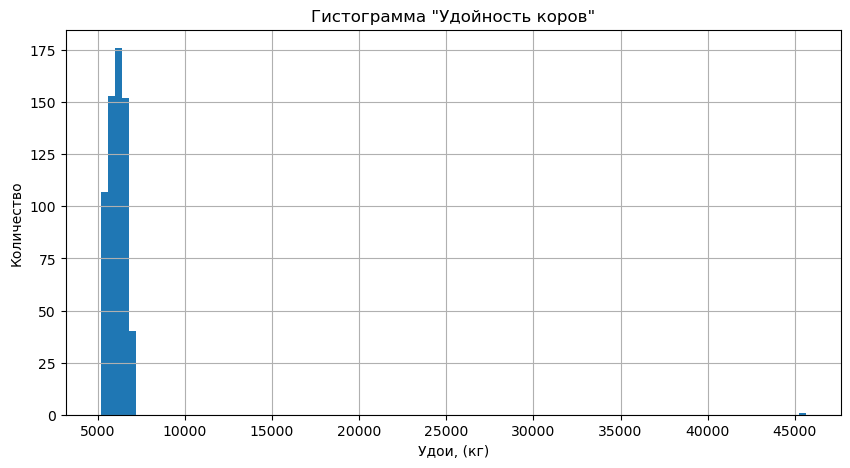

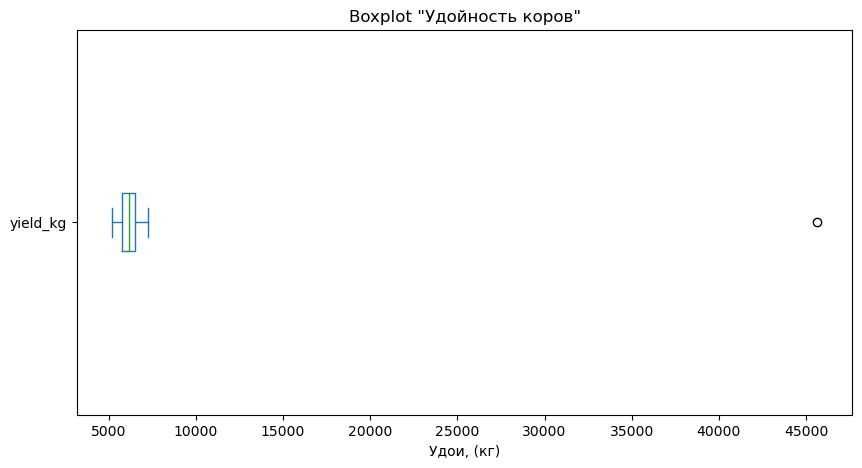

In [27]:
(
    ferma_main['yield_kg']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['yield_kg']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.show()

In [28]:
ferma_main[ferma_main['yield_kg']==ferma_main['yield_kg'].max()]

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Можно вместо выброса записать медианное значение.

In [29]:
ferma_main.loc[16,'yield_kg'] = ferma_main['yield_kg'].median()
ferma_main.iloc [[16]]

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age
16,17,6133,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [30]:
ferma_main = ferma_main.drop (index=16)
ferma_main['yield_kg'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

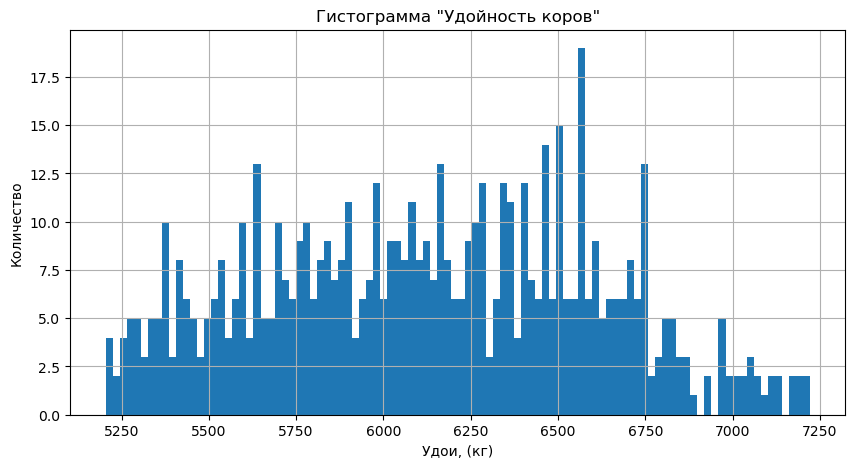

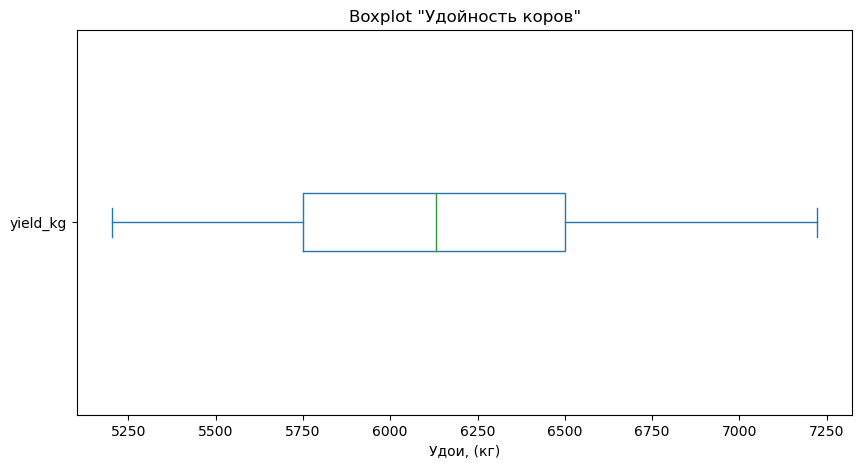

In [31]:
(
    ferma_main['yield_kg']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['yield_kg']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Удойность коров"')
plt.xlabel('Удои, (кг)')
plt.show()

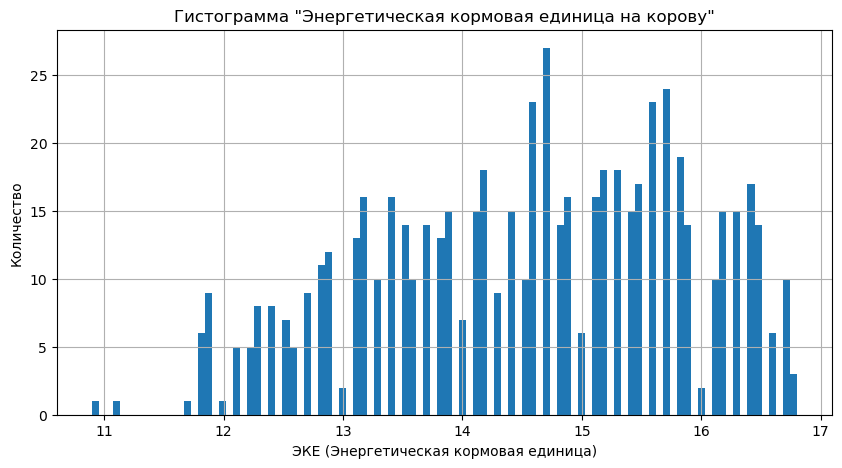

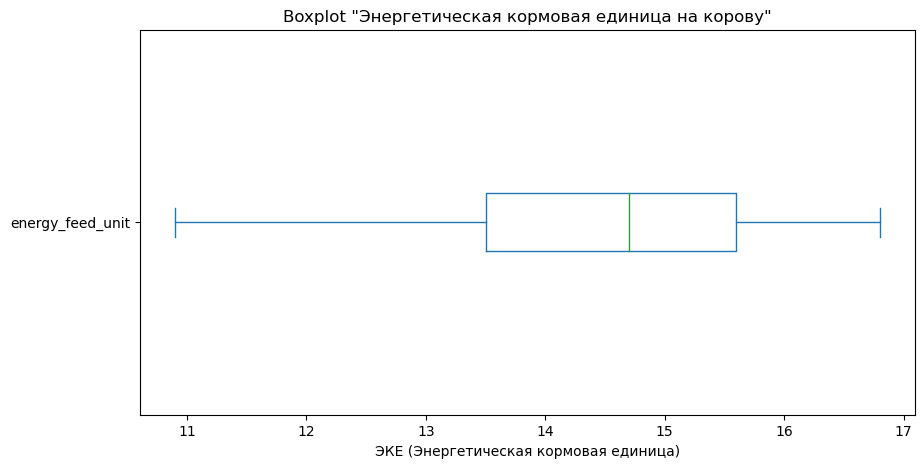

In [32]:
ax = (
    ferma_main['energy_feed_unit']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)

plt.title('Гистограмма "Энергетическая кормовая единица на корову"')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['energy_feed_unit']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Энергетическая кормовая единица на корову"')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

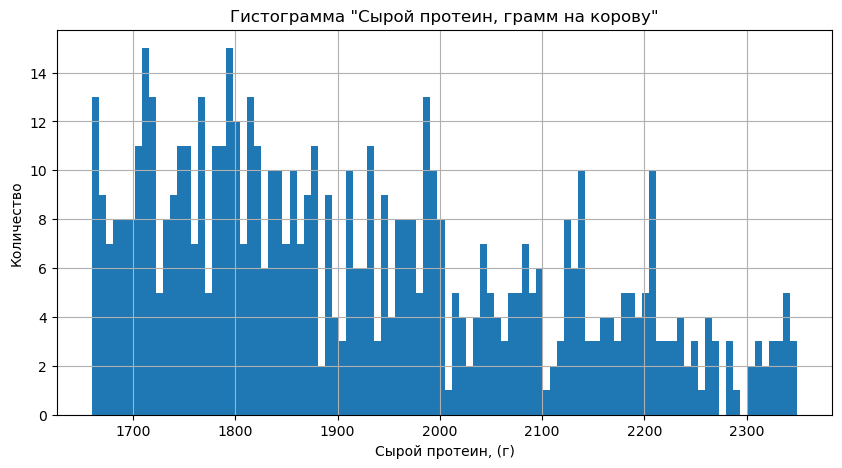

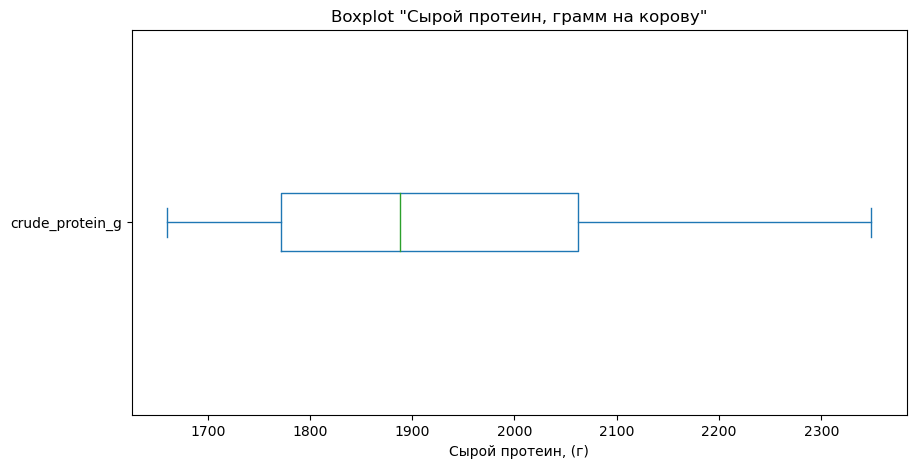

In [33]:
(
    ferma_main['crude_protein_g']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Сырой протеин, грамм на корову"')
plt.xlabel('Сырой протеин, (г)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['crude_protein_g']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Сырой протеин, грамм на корову"')
plt.xlabel('Сырой протеин, (г)')
plt.show()

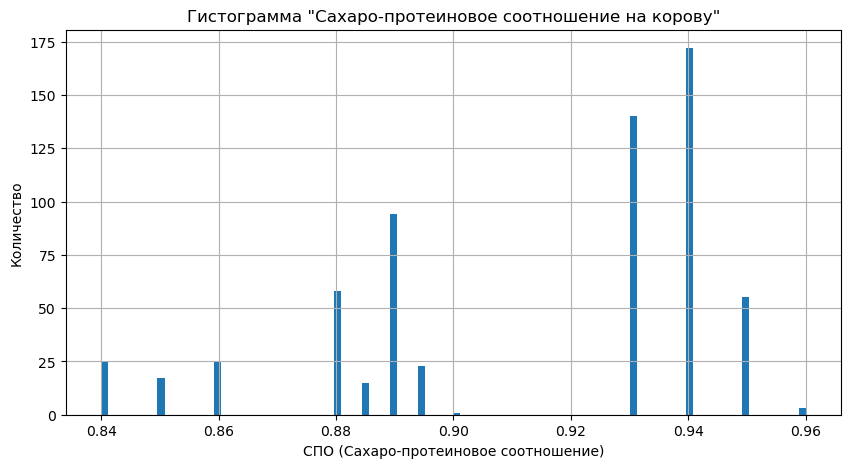

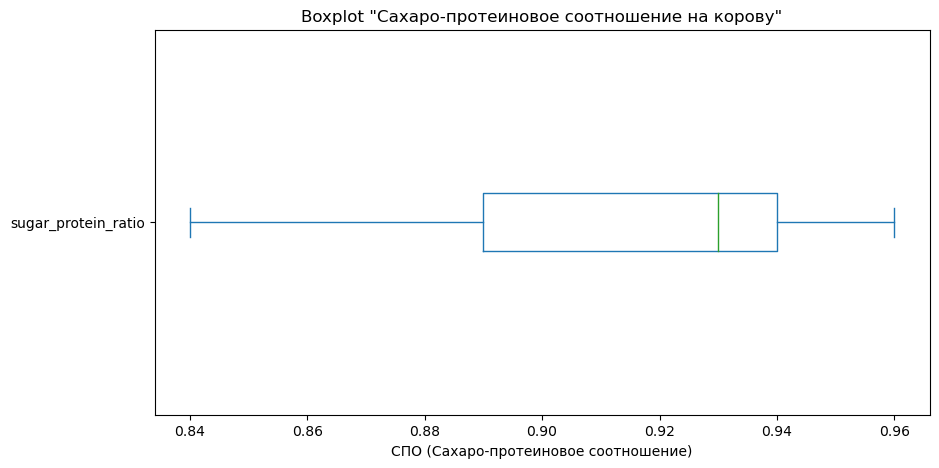

In [34]:
(
    ferma_main['sugar_protein_ratio']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Сахаро-протеиновое соотношение на корову"')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['sugar_protein_ratio']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Сахаро-протеиновое соотношение на корову"')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.show()

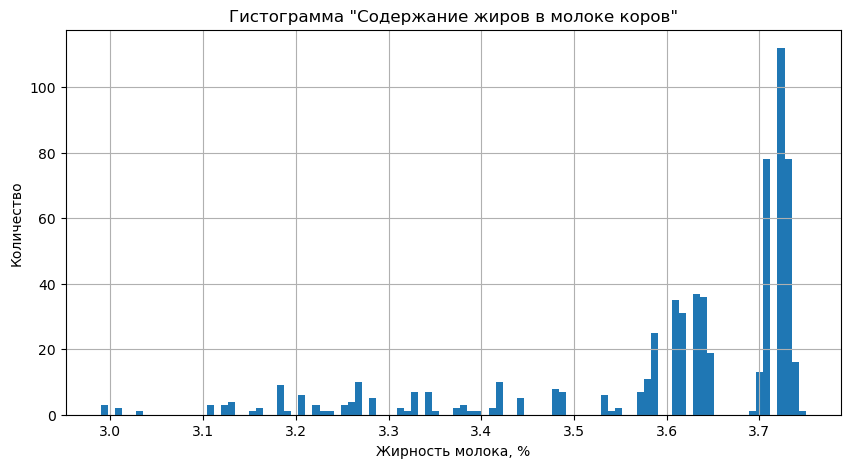

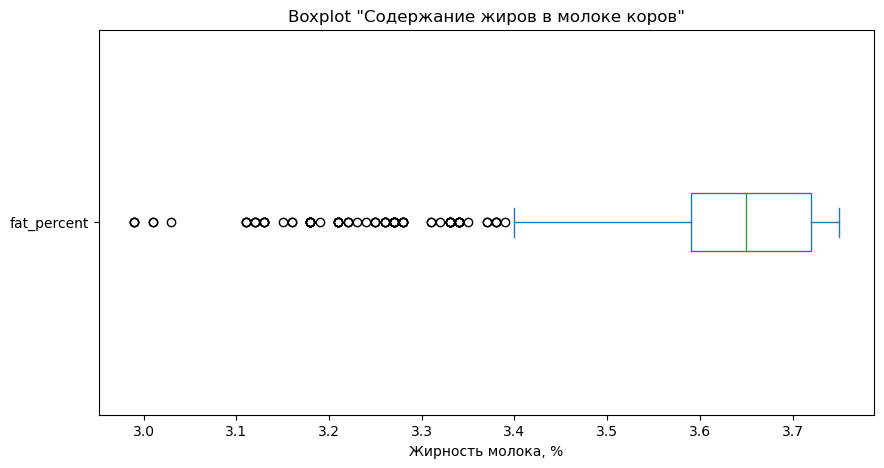

In [35]:
(
    ferma_main['fat_percent']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Содержание жиров в молоке коров"')
plt.xlabel('Жирность молока, %')
plt.ylabel('Количество')
plt.show()

(
    ferma_main['fat_percent']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Содержание жиров в молоке коров"')
plt.xlabel('Жирность молока, %')
plt.show()

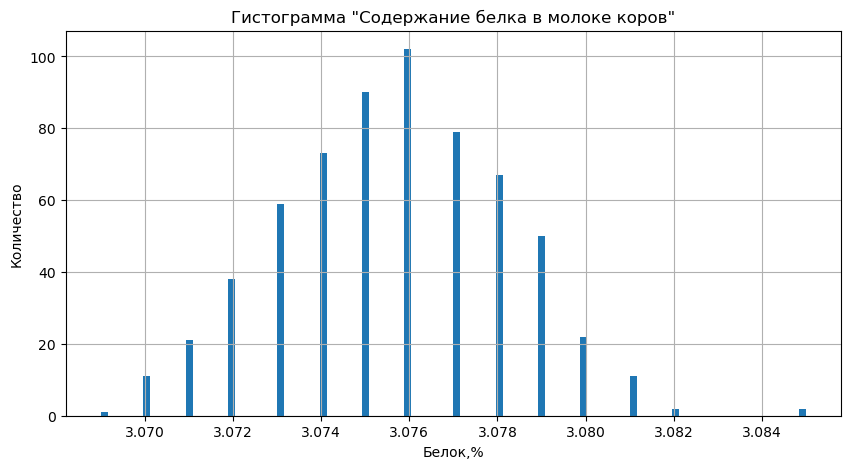

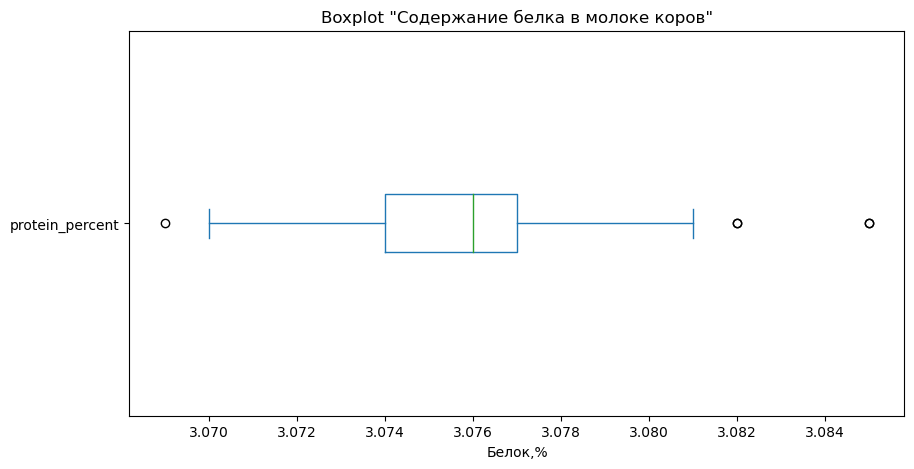

In [36]:
(
    ferma_main['protein_percent']
    .plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
)
plt.title('Гистограмма "Содержание белка в молоке коров"')
plt.xlabel('Белок,%')
plt.ylabel('Количество')
plt.show()
(
    ferma_main['protein_percent']
    .plot(kind='box', vert=False, figsize=(10, 5))
)
plt.title('Boxplot "Содержание белка в молоке коров"')
plt.xlabel('Белок,%')
plt.show()

### 3.2 Описательная статистика для строковых значний

In [37]:
ferma_main.describe(include='object')

,breed,pasture_type,sire_breed,milk_flavor,age
count,628,628,628,628,628
unique,2,2,2,2,2
top,Вис Бик Айдиал,Холмистое,Айдиал,вкусно,более_2_лет
freq,372,350,317,370,518


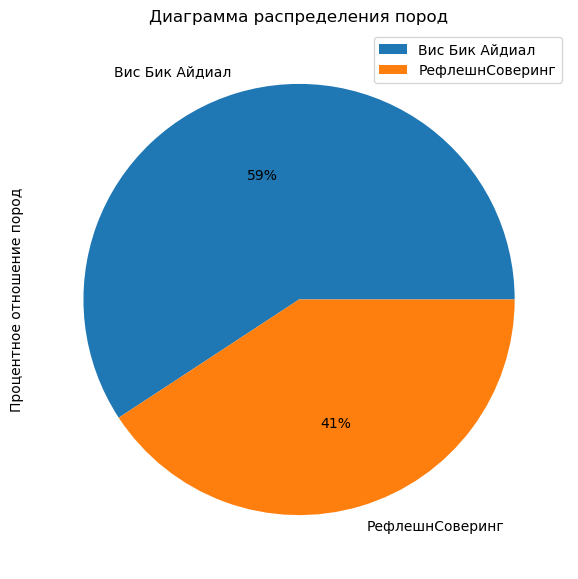

In [38]:
(
ferma_main
    .pivot_table(index='breed',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7,7), label='Процентное отношение пород')
)
plt.title('Диаграмма распределения пород')
plt.show()

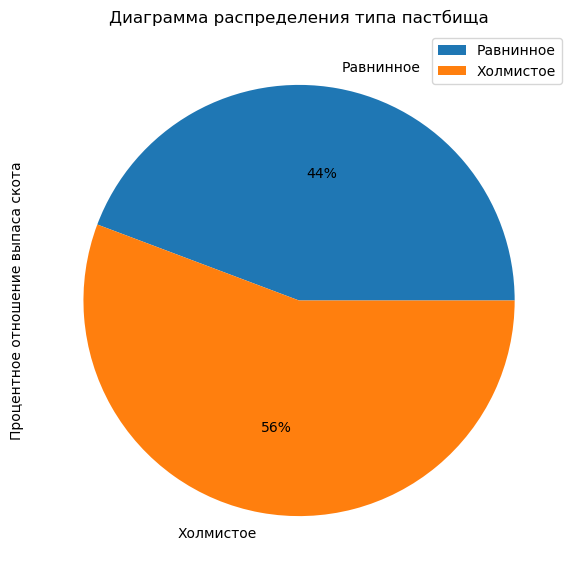

In [39]:
(
ferma_main
    .pivot_table(index='pasture_type',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7,7), label='Процентное отношение выпаса скота')
)
plt.title('Диаграмма распределения типа пастбища')
plt.show()

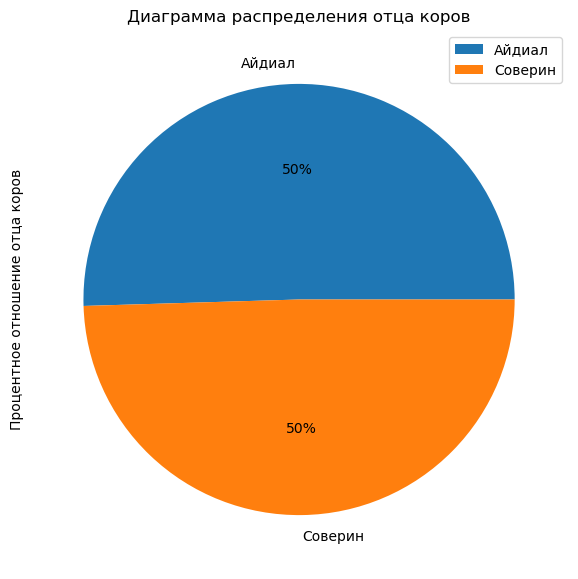

In [40]:
(
ferma_main
    .pivot_table(index='sire_breed',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7,7), label='Процентное отношение отца коров')
)
plt.title('Диаграмма распределения отца коров')
plt.show()

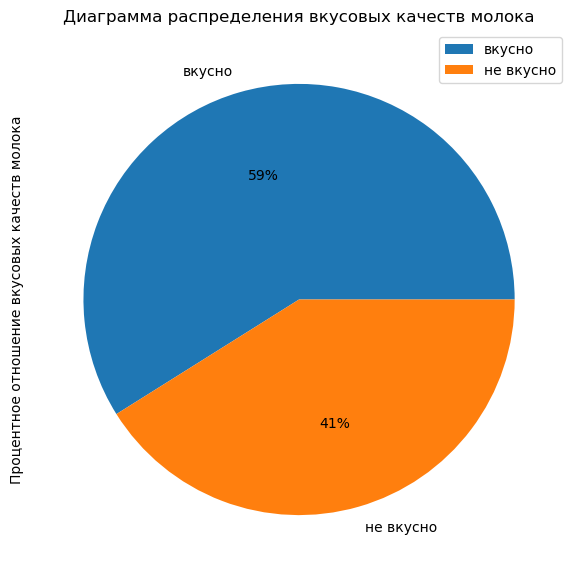

In [41]:
(
ferma_main
    .pivot_table(index='milk_flavor',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7,7), label='Процентное отношение вкусовых качеств молока')
)
plt.title('Диаграмма распределения вкусовых качеств молока')
plt.show()

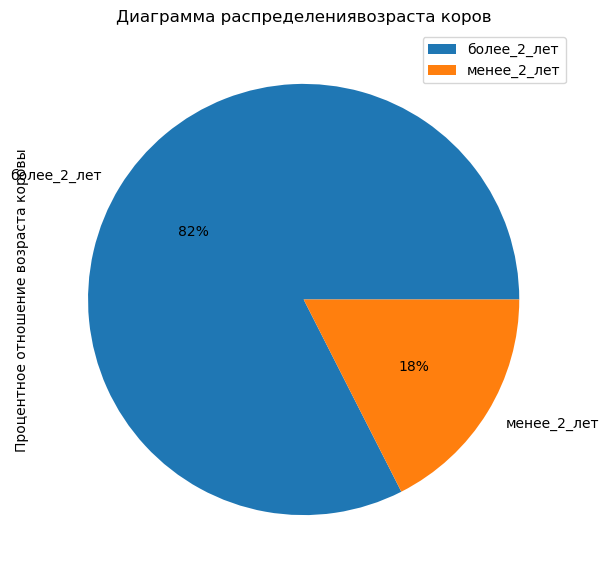

In [42]:
(
ferma_main
    .pivot_table(index='age',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7,7), label='Процентное отношение возраста коровы')
)
plt.title('Диаграмма распределениявозраста коров')
plt.show()

### 3.3 Вывод по исследовательскому анализу данных

1. Проанализировали описательную статистику и выявили выброс в столбце `ferma_main['yield_kg']` значительно превышающей медианное значение и третий квартиль. Заменили значение на медианное.
2. Построили гистограммы и boxplot для каждого числового признака, для строковых значений построили диаграммы распределения. 
3. Выявили:
+ По числовым значениям:
    + ferma_main['yield_kg'] - удой - нормальное распределение, но дисперсия слишком большая, выбросов нет
    + ferma_main['energy_feed_unit'] - ЭКЕ - нормальное распределение, дисперсия велика, выбросов нет
    + ferma_main['crude_protein_g'] - сырой протеин - не прослеживается нормальность распределения, дисперсия велика, выбросов нет
    + ferma_main['sugar_protein_ratio'] - СПО - не прослеживается нормальность распределения, больше похоже на линейную зависимость с пропусками результатов, выбросов нет
    + ferma_main['fat_percent'] - жирность - не прослеживается нормальность распределения, похоже на степенную функцию с возрастанием, присутствует большое количество выбросов, возможно это молодые коровы
    + ferma_main['protein_percent'] - протеин -  нормальное рампределение, содержит три выброса, возможно это реальные отклонения и их стоит отсеить
+ По строковым значениям:
    + ferma_main['breed'] преобладает порода Вис Бик Айдиал 59 %
    + ferma_main['pasture_type'] преобладает Холмистый выпас 56 %
    + ferma_main['sire_breed'] порода отца коров распределена поровну
    + ferma_main['milk_flavor'] преобладает вкусное молоко 59 %
    + ferma_main['age'] преобладает количество коров с возрастом более 2 лет 82 %
4. Для улучшения данных можно:
+ дополнительно запросить статистику у фермера
+ сделать срез по столбцам с выбросами `fat_percent`, `protein_percent` при прогнозировании

## 4. Корреляционный анализ

Перед анализом объединим таблицы `ferma_main` и `ferma_dad` по `id`

In [43]:
ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   yield_kg             628 non-null    int64  
 2   energy_feed_unit     628 non-null    float64
 3   crude_protein_g      628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   sire_breed           628 non-null    object 
 8   fat_percent          628 non-null    float64
 9   protein_percent      628 non-null    float64
 10  milk_flavor          628 non-null    object 
 11  age                  628 non-null    object 
 12  dad_name             628 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.7+ KB


### 4.1 Корреляция между количественными значениями

In [44]:
ferma_main

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин


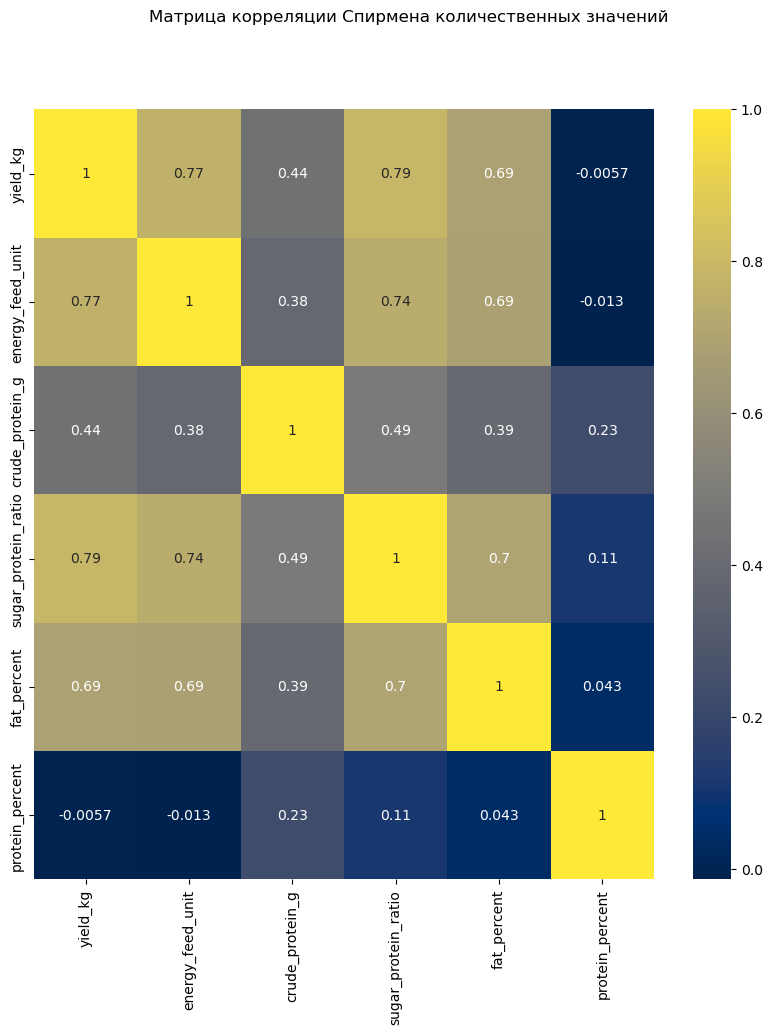

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle('Матрица корреляции Спирмена количественных значений')
sns.heatmap(ferma_main.drop('id', axis=1).select_dtypes(include=['int', 'float']).corr(method="spearman"), annot=True, cmap='cividis');

Корреляция Спирмена указывает на:
+ высокую связь между удоями и СПО corr = 0,79
+ высокую связь между удоями и ЭКЕ corr = 0,77
+ среднюю связь между удоями и жирностью corr = 0,69, однако в задаче отсутствует цель спрогнозировать жирность молока, но вот его вкус может зависеть от жирности

Между входными параметрами отсутствует связь выше 0,9 следовательно при обучении модели учитывать мультиколлинеарность не надо.

### 4.2 Диаграммы рассеяния

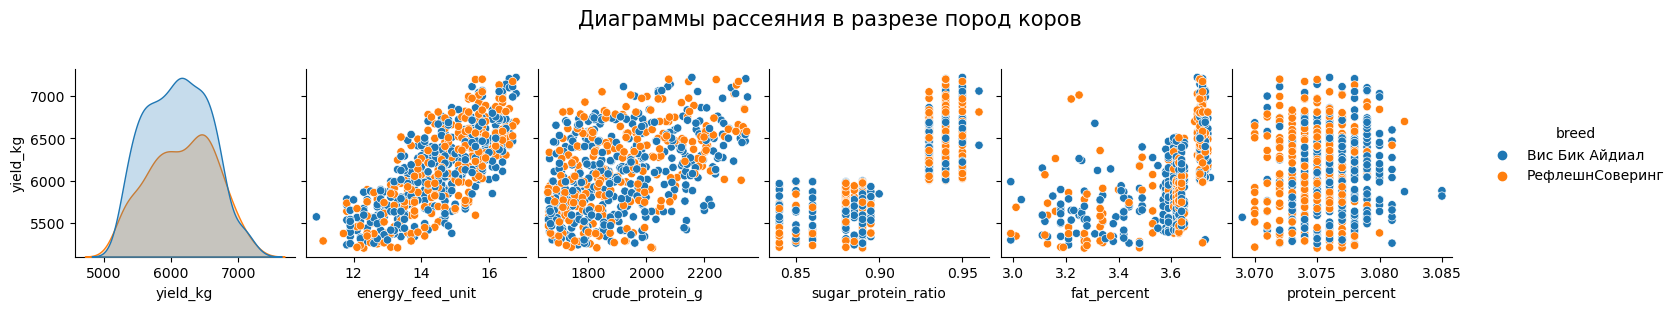

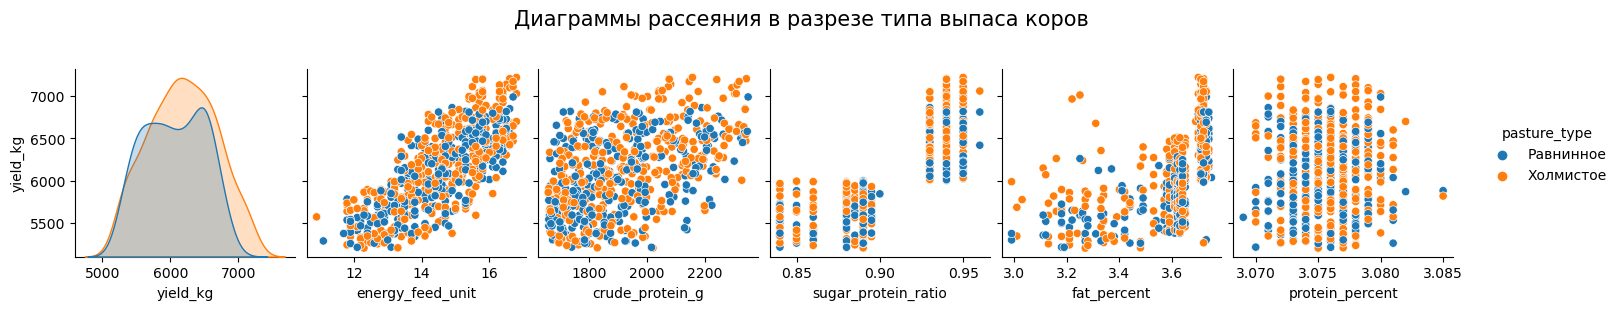

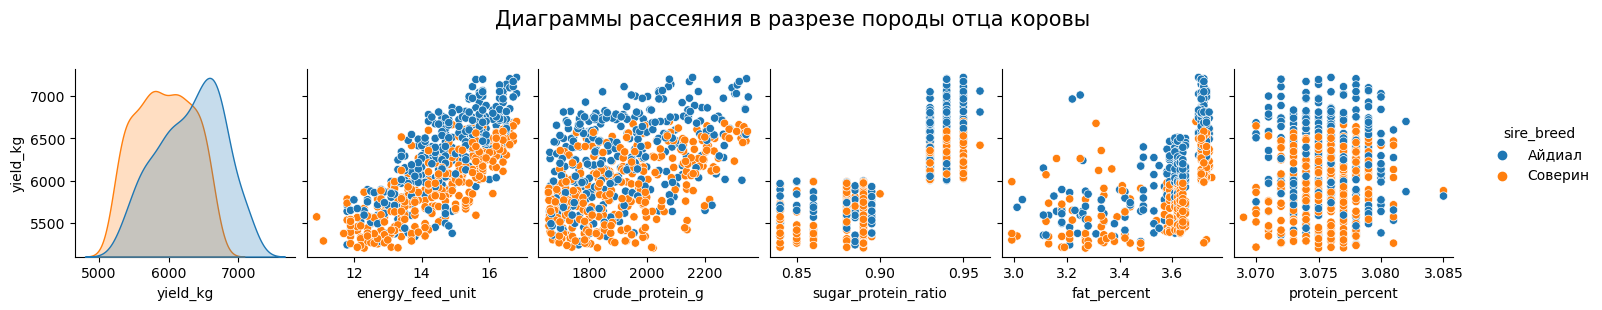

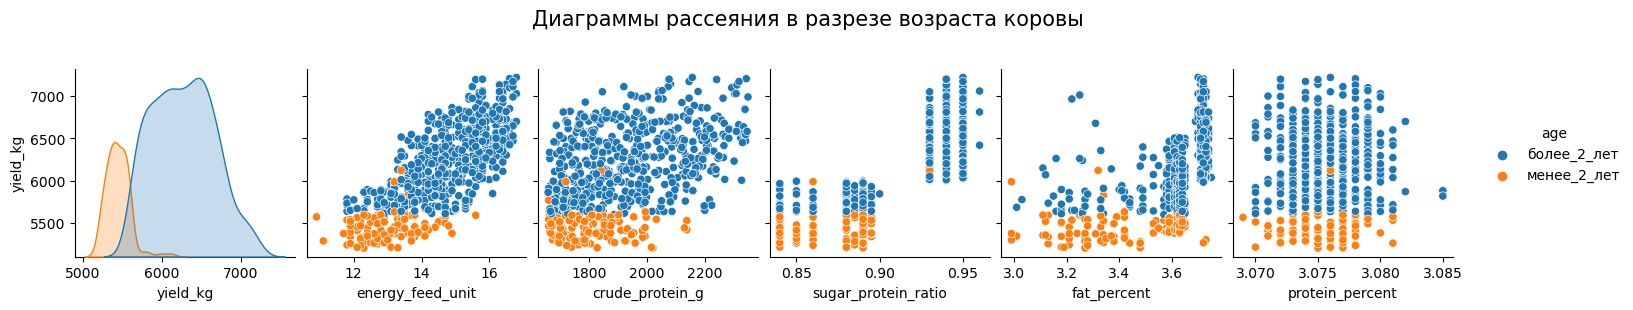

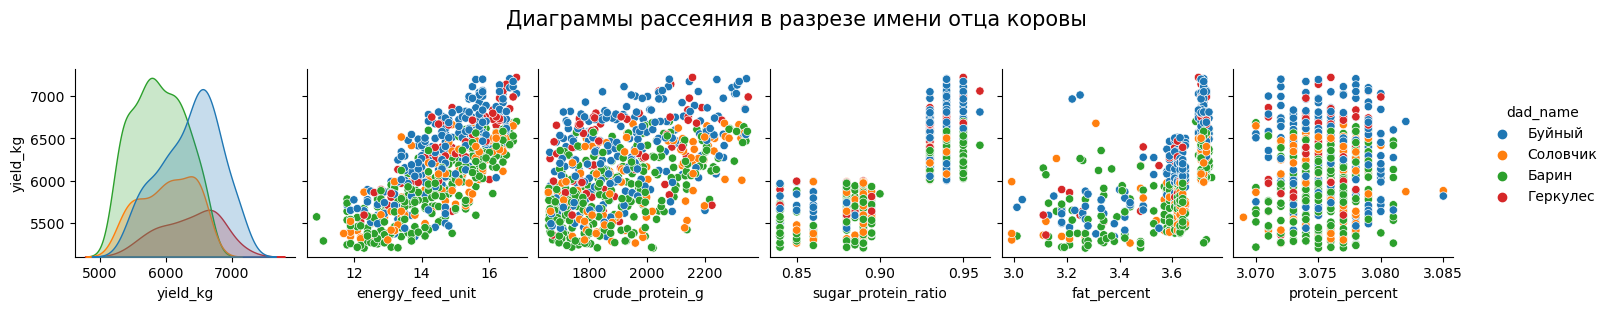

In [46]:
x=['yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percent', 'protein_percent']
y=['yield_kg']

g = sns.pairplot(ferma_main, hue="breed", x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния в разрезе пород коров", y=1.2, fontsize=15)
plt.show()

g = sns.pairplot(ferma_main, hue="pasture_type", x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния в разрезе типа выпаса коров", y=1.2, fontsize=15)
plt.show()

g = sns.pairplot(ferma_main, hue="sire_breed", x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния в разрезе породы отца коровы", y=1.2, fontsize=15)
plt.show()

g = sns.pairplot(ferma_main, hue="age", x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния в разрезе возраста коровы", y=1.2, fontsize=15)
plt.show()

g = sns.pairplot(ferma_main, hue="dad_name", x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния в разрезе имени отца коровы", y=1.2, fontsize=15)
plt.show()

Уточним диаграммы рассеяния

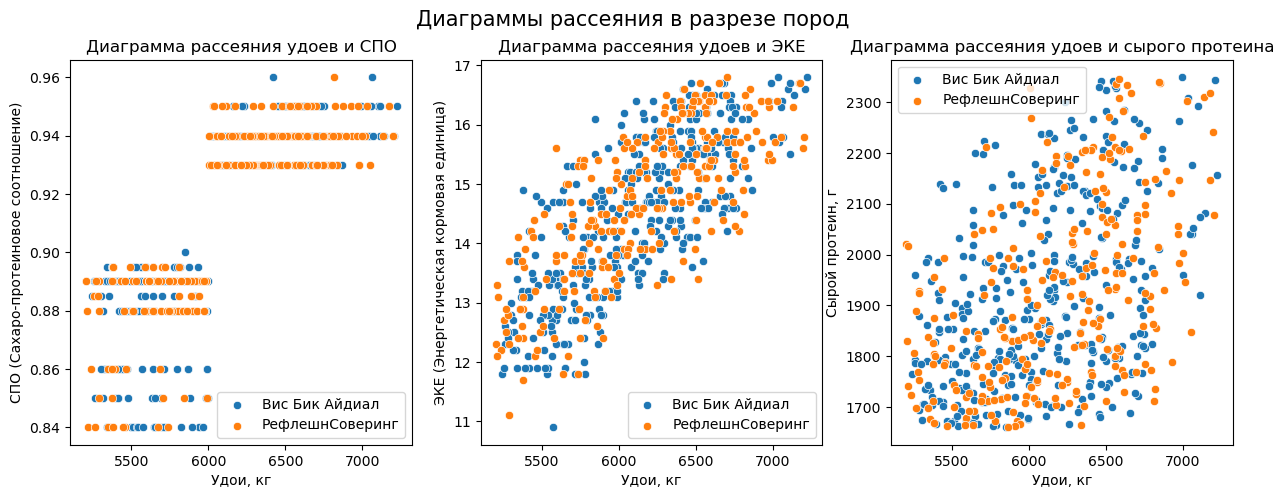

In [47]:
df1 = ferma_main[ferma_main['breed'] == 'Вис Бик Айдиал']
df2 = ferma_main[ferma_main['breed'] == 'РефлешнСоверинг']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе пород', fontsize=15)

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Вис Бик Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'РефлешнСоверинг');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

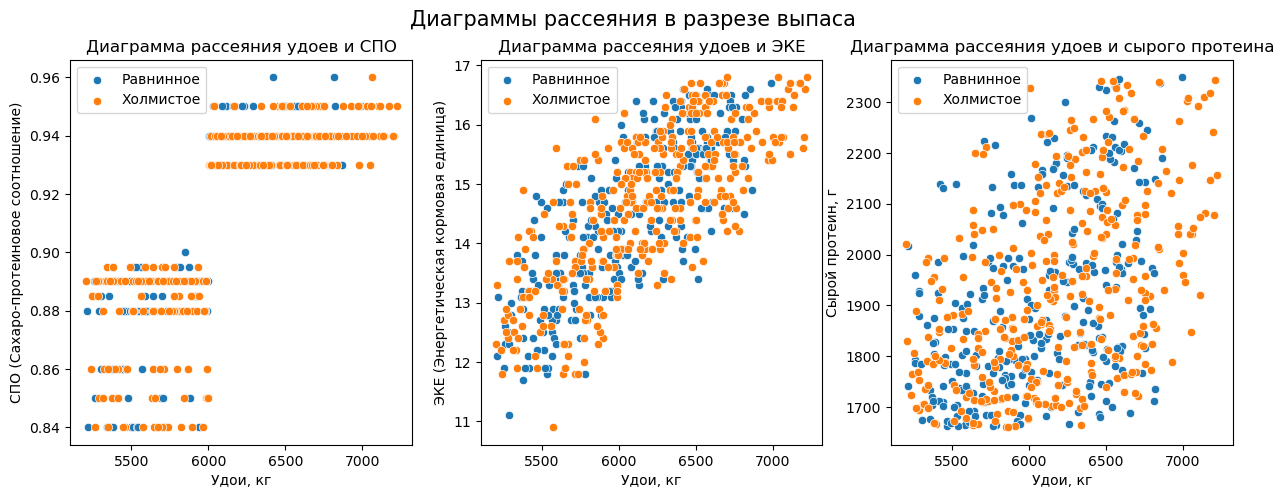

In [48]:
df1 = ferma_main[ferma_main['pasture_type'] == 'Равнинное']
df2 = ferma_main[ferma_main['pasture_type'] == 'Холмистое']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе выпаса', fontsize=15)

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Равнинное')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'Холмистое');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

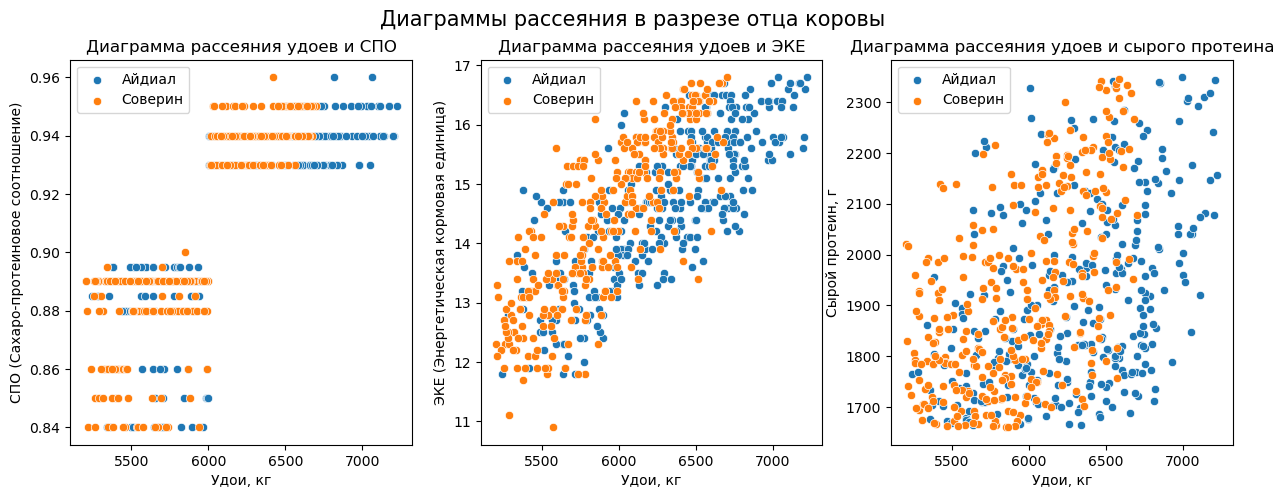

In [49]:
df1 = ferma_main[ferma_main['sire_breed'] == 'Айдиал']
df2 = ferma_main[ferma_main['sire_breed'] == 'Соверин']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе отца коровы', fontsize=15)

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Айдиал')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'Соверин');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

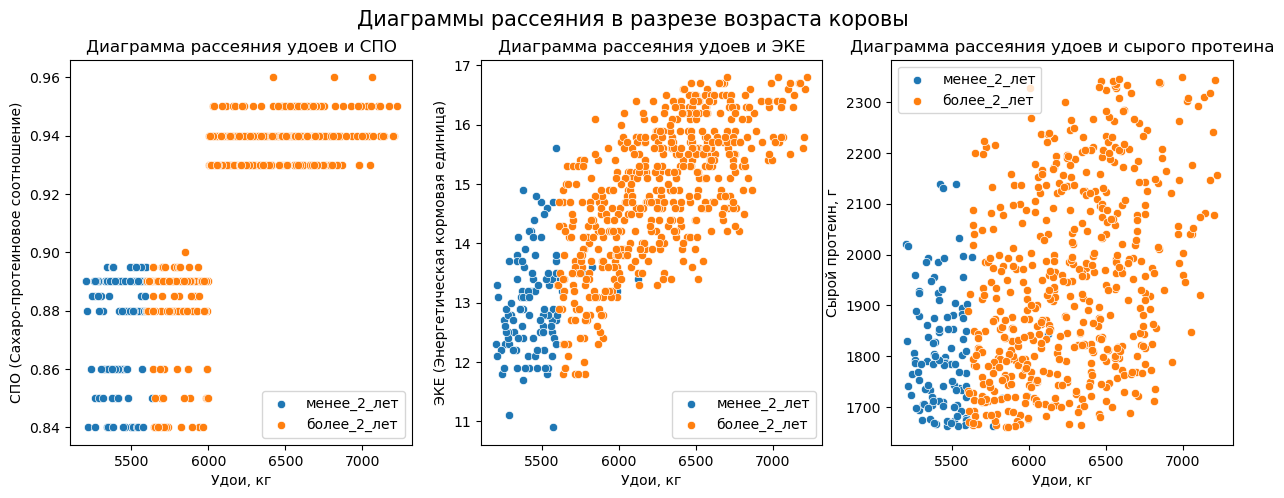

In [50]:
df1 = ferma_main[ferma_main['age'] == 'менее_2_лет']
df2 = ferma_main[ferma_main['age'] == 'более_2_лет']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе возраста коровы', fontsize=15)

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'менее_2_лет')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'более_2_лет');
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

In [51]:
ferma_main['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

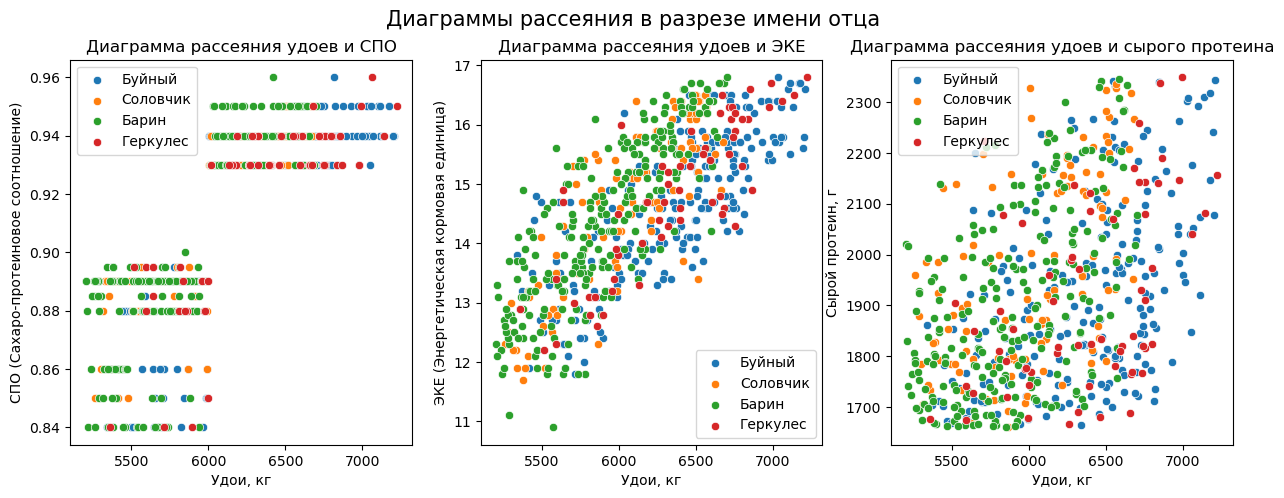

In [52]:
df1 = ferma_main[ferma_main['dad_name'] == 'Буйный']
df2 = ferma_main[ferma_main['dad_name'] == 'Соловчик']
df3 = ferma_main[ferma_main['dad_name'] == 'Барин']
df4 = ferma_main[ferma_main['dad_name'] == 'Геркулес']

plt.figure(figsize=[15, 5])
plt.suptitle('Диаграммы рассеяния в разрезе имени отца', fontsize=15)

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='yield_kg', y='sugar_protein_ratio', label = 'Буйный')
sns.scatterplot(data=df2, x='yield_kg', y='sugar_protein_ratio', label = 'Соловчик')
sns.scatterplot(data=df3, x='yield_kg', y='sugar_protein_ratio', label = 'Барин')
sns.scatterplot(data=df4, x='yield_kg', y='sugar_protein_ratio', label = 'Геркулес')
plt.title('Диаграмма рассеяния удоев и СПО')
plt.xlabel('Удои, кг')
plt.ylabel('СПО (Сахаро-протеиновое соотношение)')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='yield_kg', y='energy_feed_unit', label = 'Буйный')
sns.scatterplot(data=df2, x='yield_kg', y='energy_feed_unit', label = 'Соловчик')
sns.scatterplot(data=df3, x='yield_kg', y='energy_feed_unit', label = 'Барин')
sns.scatterplot(data=df4, x='yield_kg', y='energy_feed_unit', label = 'Геркулес')
plt.title('Диаграмма рассеяния удоев и ЭКЕ')
plt.xlabel('Удои, кг')
plt.ylabel('ЭКЕ (Энергетическая кормовая единица)')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df1, x='yield_kg', y='crude_protein_g', label = 'Буйный')
sns.scatterplot(data=df2, x='yield_kg', y='crude_protein_g', label = 'Соловчик')
sns.scatterplot(data=df3, x='yield_kg', y='crude_protein_g', label = 'Барин')
sns.scatterplot(data=df4, x='yield_kg', y='crude_protein_g', label = 'Геркулес')
plt.title('Диаграмма рассеяния удоев и сырого протеина')
plt.xlabel('Удои, кг')
plt.ylabel('Сырой протеин, г')

plt.show()

### 4.3 Вывод по корреляционному анализу

1. Коровы до 2 лет содержатся на кормах с малым СПО (до 0,90 единиц). Наблюдается чёткое разделение удойности (примерно до 5600 кг). С увеличением возраста удойность увеличиваетс как и добавление СПО.
2. Коровы у которых отец "Айдиал" переход на корм с СПО больше 0,93 оказался заметнее, удои больше.
3. ЭКЕ и удой похоже зависят друг от друга либо квадратично (виден изгиб на диаграмме рассения), либо линейно. Для корректного учёта признака будет взят его квадрат.
4. Корреляция Спирмена указывает на:
+ высокую связь между удоями и СПО corr = 0,79
+ высокую связь между удоями и ЭКЕ corr = 0,77
+ среднюю связь между удоями и жирностью corr = 0,69, однако в задаче отсутствует цель спрогнозировать жирность молока, но вот его вкус может зависеть от жирности

Между входными параметрами отсутствует связь выше 0,9 следовательно при обучении модели учитывать мультиколлинеарность не надо.

## 5. Модели линейной регрессии

### 5.1 Первая модель линейной регрессии

In [53]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   yield_kg             628 non-null    int64  
 2   energy_feed_unit     628 non-null    float64
 3   crude_protein_g      628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   sire_breed           628 non-null    object 
 8   fat_percent          628 non-null    float64
 9   protein_percent      628 non-null    float64
 10  milk_flavor          628 non-null    object 
 11  age                  628 non-null    object 
 12  dad_name             628 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 68.7+ KB


In [54]:
RANDOM_STATE = 42

cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age'
                ]
num_col_names = ['energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio'
                ]
# Отделение целевого признака
X = ferma_main.drop('yield_kg', axis=1)
y = ferma_main['yield_kg']
# Удаление излишних данных не влияющих на удой
X = X.drop(['id', 'fat_percent', 'protein_percent', 'milk_flavor'], axis=1)
X.head()

,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age,dad_name
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


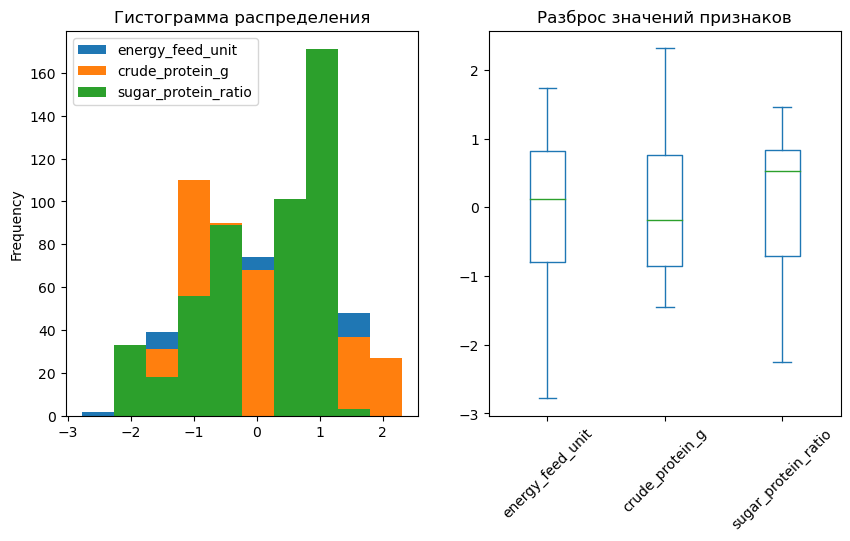

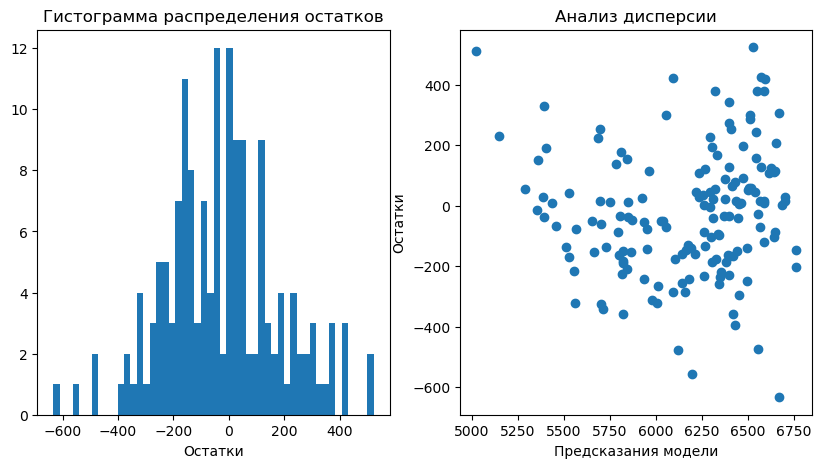

Средняя ошибки  = -25.37 
Медиана ошибки  = -34.29 

R^2 LinearRegression = 0.78 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 209.49 ((0 до +∞), lim = 0)
MSE LinearRegression  = 43887.02 ((0 до +∞), lim = 0)
MAE LinearRegression = 164.24 ((0 до +∞), lim = 0)


In [55]:
# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# Масштабирование и кодирование
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построение графиков по количественным признакам тренировочного датасета
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# Обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Рассчет остатков
residuals = y_test - predictions

# Построение графиков по количественным признакам
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print(f'Средняя ошибки  = {residuals.mean():.2f} ')
print(f'Медиана ошибки  = {residuals.median():.2f} ')
print()

# Рассчет значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# Рассчет значения RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# Рассчет значения MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# Рассчет средней абсолютной ошибки на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

#### Вывод по первой модели:
1. Значение R^2 LinearRegression = 0,78 указывает на статистическую меру согласия - насколько наша модель предсказывает лучше, чем если бы мы всегда предсказывали результат средним
2. Гистограмма остатков приближается к нормальному закону распределения, ноесть значительное различие между средним и медианным значением ошибки
3. Дисперсия остатков неравномерна 

Учитывая вышесказанное необходимо провести дополнительные исследования и преобразования данных

### 5.2 Вторая модель линейной регрессии

Преобразовываем нелинейные зависимостии переобучаем модель
1. Категориальный признак СПО `sugar_protein_ratio` в бинарный признак с явной границей в 0,92 единицы.
2. Категориальный признак ЭКЕ `energy_feed_unit` для учета изгиба данных возведем его в квадрат.

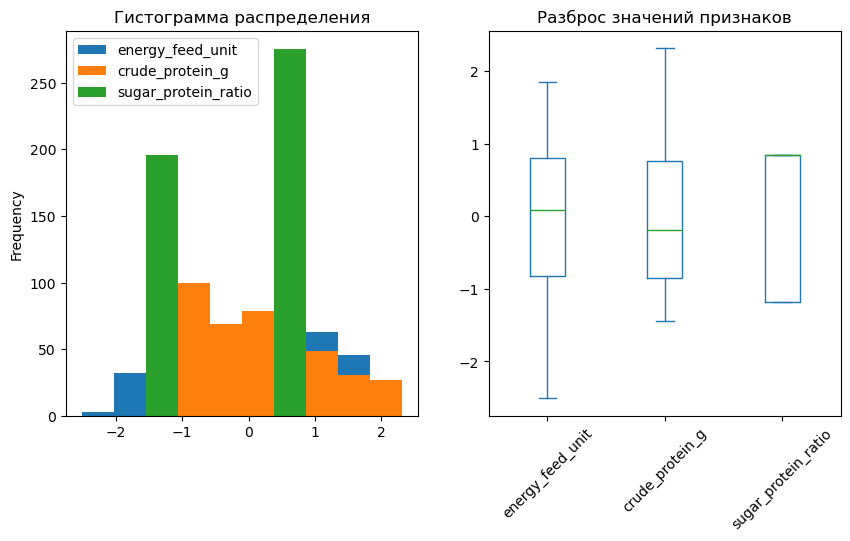

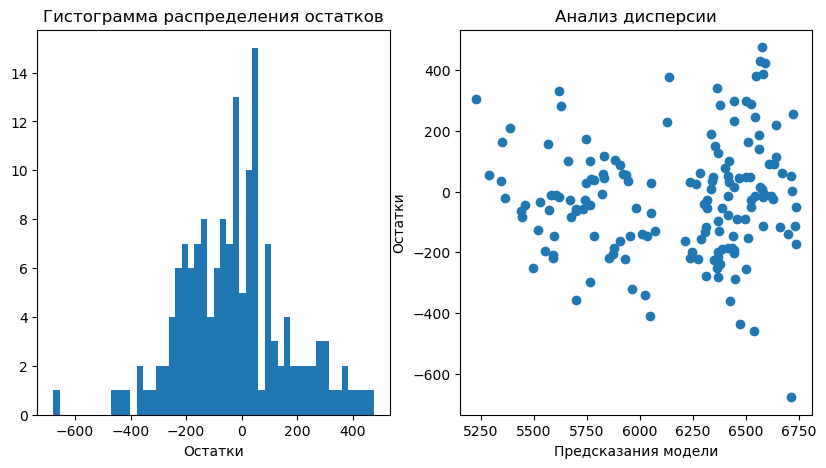

Средняя ошибки  = -24.37 
Медиана ошибки  = -27.87 

R^2 LinearRegression = 0.82 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 192.43 ((0 до +∞), lim = 0)
MSE LinearRegression  = 37030.91 ((0 до +∞), lim = 0)
MAE LinearRegression = 149.04 ((0 до +∞), lim = 0)


In [56]:
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)
# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# Масштабирование и кодирование
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построение графиков по количественным признакам тренировочного датасета
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# Обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Рассчет остатков
residuals = y_test - predictions

# Построение графиков по количественным признакам
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print(f'Средняя ошибки  = {residuals.mean():.2f} ')
print(f'Медиана ошибки  = {residuals.median():.2f} ')
print()

# Рассчет значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# Рассчет значения RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# Рассчет значения MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# Рассчет средней абсолютной ошибки на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

#### Вывод по второй модели
1. Значение R^2 LinearRegression = 0,82 указывает на статистическую меру согласия - насколько наша модель предсказывает лучше, чем если бы мы всегда предсказывали результат средним
2. Гистограмма остатков приближается к нормальному закону распределения, её среднее значение немного смещено в лево, но её медиана и среднее значения значительно приблизились и сместились правее относительно первой модели
3. Дисперсия остатков приближается к нормальному распределению, но немного смещена от центра.

### 5.3 Третья модель линейной регрессии

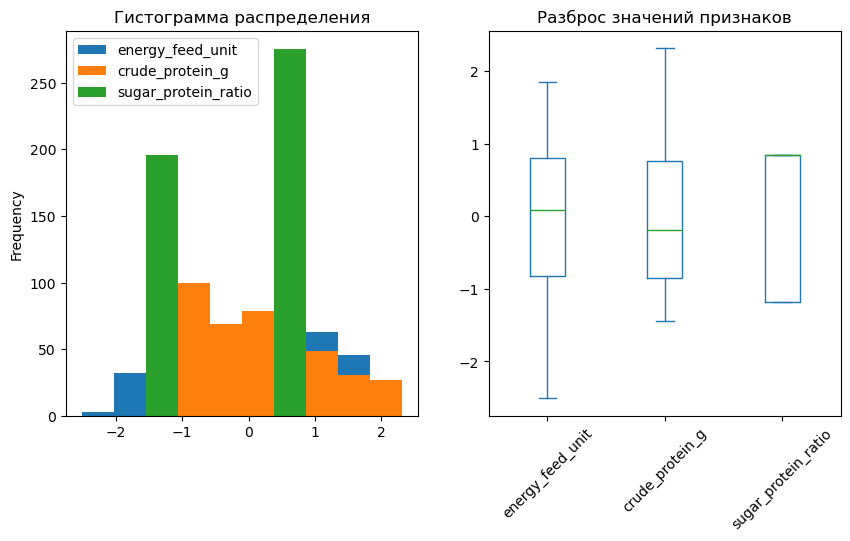

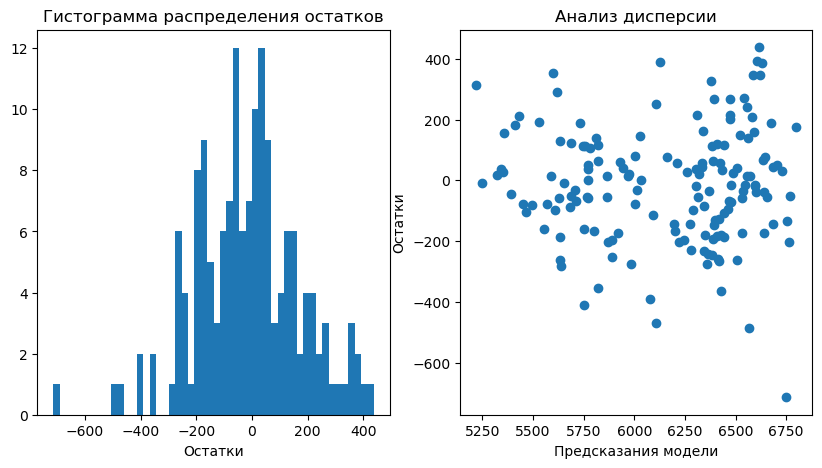

Средняя ошибки  = -15.20 
Медиана ошибки  = -15.97 

R^2 LinearRegression = 0.82 ((+∞ до 1), lim = 1) 
RMSE LinearRegression  = 188.88 ((0 до +∞), lim = 0)
MSE LinearRegression  = 35673.89 ((0 до +∞), lim = 0)
MAE LinearRegression = 146.16 ((0 до +∞), lim = 0)


In [57]:
cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age',
                 'dad_name'
                ]
num_col_names = ['energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio'
                ]

# Разделение выборки на обучающую и целевую
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

# Масштабирование и кодирование
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Построение графиков по количественным признакам тренировочного датасета
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

# Обучение модели и получение предсказаний на тестовых данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# Рассчет остатков
residuals = y_test - predictions

# Построение графиков по количественным признакам
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()
print(f'Средняя ошибки  = {residuals.mean():.2f} ')
print(f'Медиана ошибки  = {residuals.median():.2f} ')
print()

# Рассчет значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)
print(f'R^2 LinearRegression = {r2:.2f} ((+∞ до 1), lim = 1) ')

# Рассчет значения RMSE для линейной регрессии
rmse = (mean_squared_error(y_test, predictions))**0.5
print(f'RMSE LinearRegression  = {rmse:.2f} ((0 до +∞), lim = 0)')

# Рассчет значения MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)
print(f'MSE LinearRegression  = {mse:.2f} ((0 до +∞), lim = 0)')

# Рассчет средней абсолютной ошибки на тестовых данных
mae = mean_absolute_error(y_test, predictions)
print(f'MAE LinearRegression = {mae:.2f} ((0 до +∞), lim = 0)')

#### Вывод по третьей улучшенной модели
1. Значение R^2 LinearRegression = 0,82 увеличилось.
2. Гистограмма остатков приближается к нормальному закону распределения,по отношению ко второй модели значения средней и медианы ошибки сместились правее.
3. Дисперсия остатков приближается к нормальному закону, скученность уменьшилась.

Сравнительный анализ моделей по их показателям позволяют определить лучшую. Отобразим полученные данные моделей в таблицу:

| |1 модель |2 модель |3 модель
|---------------|--------|---------|----
|Средняя ошибка |-25.37 |-24.37 |-15.20
|Медиана ошибки |-34.29  |-27,87 |-15.97
|R^2 |0.78 |0.82 |0.82
|RMSE |209.49 |192.43 |188.88
|MSE |43887.02 |37030.91 |35673.89
|MAE |164.24 |149.04 |146.16

Каждая последующая модель улучшалась. Самая лучшая модель третья с ней и будем работать при прогнозировании удойности.

Расчитаем 95 % доверительный интервал модели

In [58]:
print('\n95% доверительный интервал =', stats.norm.interval
      (0.95,
       loc=np.mean(predictions), 
       scale=stats.sem(predictions)
      ))


95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


### 5.4 Прогноз удоя коров, которых фермер хочет купить

Добавим отсутствующие столбцы в `cow_buy`:
+ ЭКЕ (Энергетическая кормовая единица) = `'energy_feed_unit'`
+ Сырой протеин, г = `'crude_protein_g'`
+ СПО (Сахаро-протеиновое соотношение) = `'sugar_protein_ratio'`

Возьмем среднее значение из `ferma_main` и увеличим на 5%.

In [59]:
ferma_main.head()

,id,yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percent,protein_percent,milk_flavor,age,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [60]:
X_g = cow_buy
# Добавление столбцов со средними значениями из ferma_main + 5%
X_g['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean()*1.05
X_g['crude_protein_g'] = (ferma_main['crude_protein_g'].mean()*1.05).astype(int)
X_g['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean()*1.05
# Приведение колонок в соответствие
columns = ferma_main.columns
columns = columns.drop(labels=['id','yield_kg',  'milk_flavor'])
X_g = X_g[columns]
# Удаление данных не влияющих на удой
X_g = X_g.drop(['fat_percent', 'protein_percent'], axis=1)
# Преобразование столбцов к требованиям 3 модели
X_g['sugar_protein_ratio'] = X_g['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X_g['energy_feed_unit'] = X_g['energy_feed_unit'].apply(lambda x: x**2)
X_g

,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age,dad_name
0,233.361138,2019,1,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Геркулес
1,233.361138,2019,1,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Буйный
2,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин
3,233.361138,2019,1,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,233.361138,2019,1,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,Буйный
5,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет,Геркулес
6,233.361138,2019,1,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Геркулес
7,233.361138,2019,1,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,Буйный
8,233.361138,2019,1,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин
9,233.361138,2019,1,РефлешнСоверинг,Холмистое,Айдиал,менее_2_лет,Буйный


In [61]:
X.head()

,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,age,dad_name
0,201.64,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,163.84,2138,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
2,196.00,1854,0,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
3,153.76,2012,0,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,163.84,1675,0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин


In [62]:
# Подготовка признаков (масштабирование и кодирование)
X_g_ohe = encoder.transform(X_g[cat_col_names])
X_g_scaled = scaler.transform(X_g[num_col_names])
X_g_ohe = pd.DataFrame(X_g_ohe, columns=encoder_col_names)
X_g_scaled = pd.DataFrame(X_g_scaled, columns=num_col_names)
X_g = pd.concat([X_g_ohe, X_g_scaled], axis=1)

# Предсказание данных
predictions = model_lr.predict(X_g)

# Таблица
buy = cow_buy.copy()
buy['predictions_yield_kg'] = predictions.astype(int)

In [63]:
print('Модель предлагает купить', len(buy[buy['predictions_yield_kg']>6000]), 'коров из', len(cow_buy), 'предлагаемых "ЭкоФермой"')
print('Список коров "Экофермы" и ожидаемые удои в таблице ниже:')
buy

Модель предлагает купить 20 коров из 20 предлагаемых "ЭкоФермой"
Список коров "Экофермы" и ожидаемые удои в таблице ниже:


,breed,pasture_type,sire_breed,dad_name,fat_percent,protein_percent,age,energy_feed_unit,crude_protein_g,sugar_protein_ratio,predictions_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,6609
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019,0.958744,6378
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,6283
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019,0.958744,6592
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019,0.958744,6541
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019,0.958744,6425
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,6609
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019,0.958744,6570
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,6283
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019,0.958744,6400


### 5.5 Вывод прогноза выбора коров обученной моделью

С учетом данных "ЭкоФермы" и пересмотром кормления (увеличение ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение) на 5 % для новых коров) модель спрогнозировала, что все коровы из 20 предложенных и указанных в таблице `buy` будут давать молока больше 6000 кг. в год.

## 6. Задача классификации

### 6.1 Подготовка данных для обучения модели логистической регрессии

In [64]:
RANDOM_STATE = 42

cat_col_names = ['breed',
                 'pasture_type',
                 'sire_breed',
                 'age',
                 'dad_name']
num_col_names = ['yield_kg',
                 'energy_feed_unit',
                 'crude_protein_g',
                 'sugar_protein_ratio',
                 'fat_percent',
                 'protein_percent'
                ]
# Отделение целевого признака
X = ferma_main.drop('milk_flavor', axis=1)
y = ferma_main['milk_flavor']
X_g = buy
# Перевод в числовой признак: Вкусно = 1, Не вкусно = 0
y = y.apply(lambda x: 0 if x=='не вкусно' else 1)

# Удаление данных не влияющих на удой
X = X.drop(['id'], axis=1)
# Переименование столбца
X_g.columns = X_g.columns.str.replace('predictions_yield_kg', 'yield_kg')
# Перестановка столбцов
columns = X.columns
X_g = X_g[columns]
# Преобразование столбцов
X['sugar_protein_ratio'] = X['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X['energy_feed_unit'] = X['energy_feed_unit'].apply(lambda x: x**2)
X_g['sugar_protein_ratio'] = X_g['sugar_protein_ratio'].apply(lambda x: 1 if x>0.92 else 0)
X_g['energy_feed_unit'] = X_g['energy_feed_unit'].apply(lambda x: x**2)
# Приведение типов
X_g[['yield_kg', 'crude_protein_g']] = ferma_main[['yield_kg', 'crude_protein_g']].astype('int')

# Проверка на совпадение и разницу в названияж столбцов
X_cols = X.columns
X_g_cols = X_g.columns
common_cols = X_cols.intersection(X_g_cols)
train_not_test = X_cols.difference(X_g_cols)
print('Совпадающие столбцы', common_cols)
print('Разные столбцы', train_not_test)

Совпадающие столбцы Index(['yield_kg', 'energy_feed_unit', 'crude_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'sire_breed',
       'fat_percent', 'protein_percent', 'age', 'dad_name'],
      dtype='object')
Разные столбцы Index([], dtype='object')


In [65]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)

# Масштабирование и кодирование
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели
clf = LogisticRegression(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)
# Получение предсказания
y_pred = clf.predict(X_test)

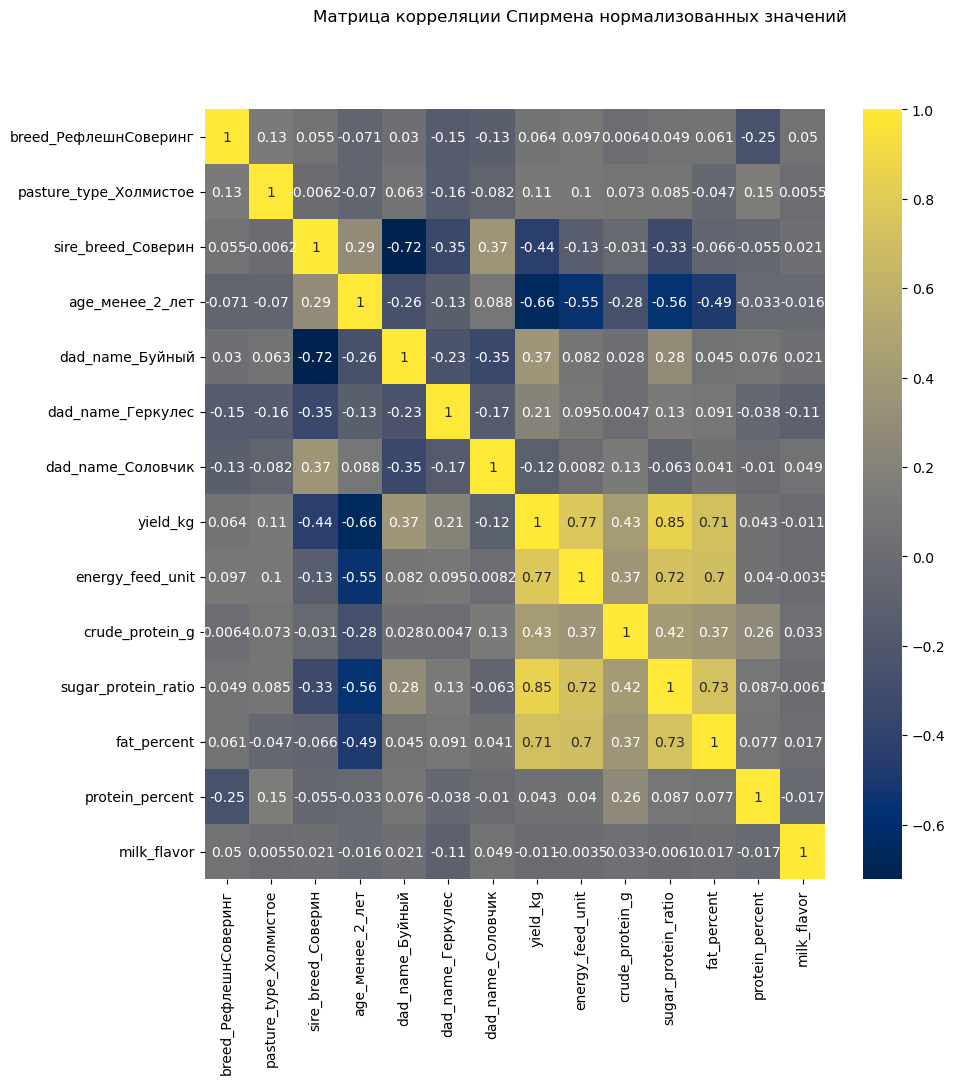

In [66]:
# Построение матрицы корреляций
x_corr = X_train
x_corr['milk_flavor'] = y_train
fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle('Матрица корреляции Спирмена нормализованных значений')
sns.heatmap(x_corr.corr(method="spearman"), annot=True, cmap='cividis');

Вкус молока может зависеть от жирности, породы коров и типа выпаса.
Условием правильной классификации является наличие линейной зависимости между входными и прогнозными значениями.
Такой зависимости нет, значит построить рабочую модель основанную на логистической функции не выйдет. 
Скорее всего это произошло потому что, у каждого человека вкусы субъективные. 

Посмотрим на результаты работы модели

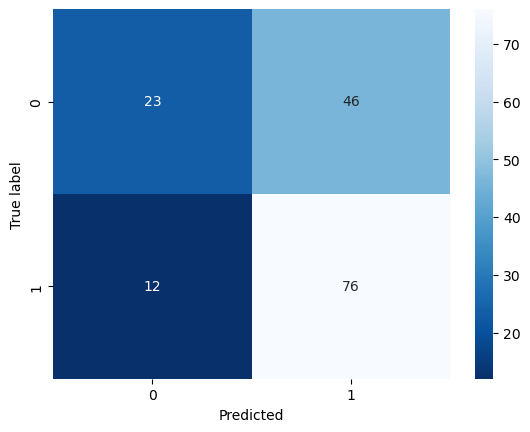

In [67]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [68]:
# Рассчет показателей
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',round(acc,3), '- Доля правильных ответов')

recall = recall_score(y_test, y_pred)
print('recall: ',round(recall ,3), '- Ошибка FN (False Negative)')

precision = precision_score(y_test, y_pred) 
print('precision: ',round(precision,3), '- Ошибка FP (False Positive)')

accuracy:  0.631 - Доля правильных ответов
recall:  0.864 - Ошибка FN (False Negative)
precision:  0.623 - Ошибка FP (False Positive)


### 6.2 Анализ модели логистической регресии

1. Ошибка FN (False Negative). Модель ошибается и указывает на то что молоко невкусное, хотя это не так - для нас это даже хорошо.
2. Ошибка FP (False Positive). Модель ошибается и указывает на то, что молоко вкусное, хотя это не так - это плохо, необходимо минимизировать её.

In [69]:
# Функция рассчета предсказаний с учетом изменяемого порога
# Использование функции predict_proba взамен predict
def custom_predict(X, threshold):
    probs = clf.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int), probs[:, 1]

In [70]:
# Создание Dataframe со значениями порога ('thresholds') от 0.01 до 0.99 с шагом 0.01
# Значения: 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp'
thresholds = [i/100 for i in range(1,100)]

acc = []
recall = []
precision = []
tn = []
fp = []
fn = []
tp = []
# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    new_preds = custom_predict(X=X_test, threshold=threshold)[0]
    # Расчет показателей 'accuracy: ',round(acc,3), '(Доля правильных ответов)'
    acc.append(accuracy_score(y_test, new_preds))
    # Расчет показателей 'recall: ',round(recall ,3), '(Ошибка FN (False Negative))'
    recall.append(recall_score(y_test, new_preds))
    # Расчет показателей 'precision: ',round(precision,3), '(Ошибка FP (False Positive))'
    precision.append(precision_score(y_test, new_preds, zero_division=0))
    # Расчет количества ошибок по типам
    tn.append(np.sum((new_preds == 0) & (y_test == 0)))
    fp.append(np.sum((new_preds == 1) & (y_test == 0)))
    fn.append(np.sum((new_preds == 0) & (y_test == 1)))
    tp.append(np.sum((new_preds == 1) & (y_test == 1)))
    
acc, recall, precision
df = pd.DataFrame([thresholds, acc, recall, precision, tn, fp, fn, tp]).T
df.columns = ['thresholds', 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp']
df

,thresholds,acc,recall,precision,tn,fp,fn,tp
0,0.01,0.56051,1.0,0.56051,0.0,69.0,0.0,88.0
1,0.02,0.56051,1.0,0.56051,0.0,69.0,0.0,88.0
2,0.03,0.56051,1.0,0.56051,0.0,69.0,0.0,88.0
3,0.04,0.56051,1.0,0.56051,0.0,69.0,0.0,88.0
4,0.05,0.56051,1.0,0.56051,0.0,69.0,0.0,88.0
...,...,...,...,...,...,...,...,...
94,0.95,0.43949,0.0,0.00000,69.0,0.0,88.0,0.0
95,0.96,0.43949,0.0,0.00000,69.0,0.0,88.0,0.0
96,0.97,0.43949,0.0,0.00000,69.0,0.0,88.0,0.0
97,0.98,0.43949,0.0,0.00000,69.0,0.0,88.0,0.0


In [71]:
# Поиск порогового значения `thresholds` для минимизации ошибки FP (False Positive)
thresholds_precision = df[df['fp']!=0].tail(1)['thresholds'].values[0]

print('Минимизация ошибки FP (False Positive)  при threshold =', thresholds_precision) 
print('\nЗначения показателей при пороге = ', thresholds_precision)
df[df['thresholds']==thresholds_precision]

Минимизация ошибки FP (False Positive)  при threshold = 0.8

Значения показателей при пороге =  0.8


,thresholds,acc,recall,precision,tn,fp,fn,tp
79,0.8,0.496815,0.113636,0.909091,68.0,1.0,78.0,10.0


#### Вывод по анализу модели логистическй регрессии
1. Наиболее критична ошибка False Positive. Необходимо минимизировать её, т.к. модель указывает что молоко вкусное, но это не так.
2. В ходе минимизации ошибки подобран порог принадлежности к классам = 0.80 при этом значение важных метрик составило АСС = 0.496 (уменьшилось с 0.63), Recall = 0.113 (уменьшилось с 0.86), Precision = 0.909 (увеличилось с 0.62).
3. Однако порог в 0.80 в нашей модели неоправдан, так как вкус молока не сильно влияет на продажу.

### 6.3 Прогноз вкуса молока коров, которых фермер хочет купить

In [72]:
# Масштабирование и кодирование
X_g_ohe = encoder.transform(X_g[cat_col_names])
X_g_scaled = scaler.transform(X_g[num_col_names])
X_g_ohe = pd.DataFrame(X_g_ohe, columns=encoder_col_names)
X_g_scaled = pd.DataFrame(X_g_scaled, columns=num_col_names)
X_g = pd.concat([X_g_ohe, X_g_scaled], axis=1)

# Предсказание на данных с выбранным порогом
predictions_precision = custom_predict(X=X_g, threshold=thresholds_precision)
predictions_precision

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.70969827, 0.74759109, 0.57443405, 0.43875919, 0.59861747,
        0.13618448, 0.71614155, 0.63038681, 0.48200217, 0.77314645,
        0.17181349, 0.59035174, 0.15665152, 0.58711243, 0.52895758,
        0.39547753, 0.70903341, 0.11783177, 0.43182643, 0.50270982]))

In [73]:
buy['milk_flavor_precision'] = predictions_precision[0]
buy['probability'] = predictions_precision[1]
print('Модель предлагает купить', len(buy[buy['milk_flavor_precision']==1]), 'из', len(cow_buy), 'предлагаемых "ЭкоФермой" по вкусности молока')

Модель предлагает купить 0 из 20 предлагаемых "ЭкоФермой" по вкусности молока


In [74]:
# Функция для предсказания с разными порогами
def custom_predict_with_thresholds(X, thresholds):
    predictions = {}
    for threshold in thresholds:
        preds = custom_predict(X=X, threshold=threshold)
        predictions[threshold] = preds[0]
    return predictions

# Определяем пороги
thresholds = [0.6, 0.65, 0.7, 0.75, 0.8]

# Получаем предсказания для каждого порога
predictions_dict = custom_predict_with_thresholds(X=X_g, thresholds=thresholds)

# Добавляем предсказания в DataFrame
for threshold, preds in predictions_dict.items():
    col_name = f'milk_flavor_precision_{threshold}'
    buy[col_name] = preds

# Добавляем общий столбец 'probability'
buy['probability'] = predictions_precision[1]

# Вывод диапазона значений milk_flavor_precision
print('Диапазон значений milk_flavor_precision:')
print(buy[[f'milk_flavor_precision_{threshold}' for threshold in thresholds]].describe())

# Фильтрация и вывод строк, где milk_flavor_precision больше 0.6 для порога 0.6
print('Строки, где milk_flavor_precision больше 0.6 для порога 0.6:')
print(buy[buy['milk_flavor_precision_0.6'] > 0.6])

# Вывод всей таблицы с добавленным удоем и вкусом молока
print('Таблица с добавленным удоем и вкусом молока для разных порогов:')
print(buy.head(20))


Диапазон значений milk_flavor_precision:
       milk_flavor_precision_0.6  milk_flavor_precision_0.65  \
count                  20.000000                   20.000000   
mean                    0.300000                    0.250000   
std                     0.470162                    0.444262   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     1.000000                    0.250000   
max                     1.000000                    1.000000   

       milk_flavor_precision_0.7  milk_flavor_precision_0.75  \
count                  20.000000                   20.000000   
mean                    0.250000                    0.050000   
std                     0.444262                    0.223607   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000  

#### Вывод по прогнозу модели
1. Ошибка FP (False Positive). Модель ошибается и указывает на то, что молоко вкусное, хотя это не так - это плохо, необходимо минимизировать её
2. Подобран порог принадлежности к классам = 0.80 при этом значение важных метрик составило АСС = 0.496 (уменьшилось с 0.63), Recall = 0.113 (уменьшилось с 0.86), Precision = 0.909 (увеличилось с 0.62)
3. Результатом минимализации стало, что модель не рекомендует покупать коров в "ЭкоФерме".

## 7. Итоговые выводы

### 7.1 Добавление прогнозов вкуса молока и удоя коров в датафрейм с коровами "ЭкоФерма"

Добавляем прогнозы вкуса молока и удоя коров в датафрейм с коровами `cow_buy`, покупку которых рассматривает фермер. 
+ В столбце `milk_flavor_precision` и `milk_flavor_recommended` обозначения: `0` - невкусное молоко, `1` - вкусное молоко.

In [75]:
cow_buy['forecast_yield_kg'] = buy['yield_kg']
cow_buy['milk_flavor_precision'] = buy['milk_flavor_precision']
cow_buy['probability'] = buy['probability'].round(2)
cow_buy

,breed,pasture_type,sire_breed,dad_name,fat_percent,protein_percent,age,energy_feed_unit,crude_protein_g,sugar_protein_ratio,forecast_yield_kg,milk_flavor_precision,probability
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,6609,0,0.71
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019,0.958744,6378,0,0.75
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,6283,0,0.57
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019,0.958744,6592,0,0.44
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019,0.958744,6541,0,0.60
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019,0.958744,6425,0,0.14
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019,0.958744,6609,0,0.72
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019,0.958744,6570,0,0.63
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019,0.958744,6283,0,0.48
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019,0.958744,6400,0,0.77


### 7.2 Отбор коров, для которых спрогнозирован удой более 6000 кг в год и вкусное молоко

In [76]:
print('Модель предлагает купить', len(cow_buy.query('forecast_yield_kg > 6000 and milk_flavor_precision == 1')), 'из', len(cow_buy), 'предлагаемых "ЭкоФермой" по вкусности молока  и годовому удою больше 6000 кг:')
cow_buy.query('forecast_yield_kg > 6000 and milk_flavor_precision == 1'); 

Модель предлагает купить 0 из 20 предлагаемых "ЭкоФермой" по вкусности молока  и годовому удою больше 6000 кг:


### 7.3 Результаты работы моделей для фермера

1. Спрогнозированы удои новых коров из "ЭкоФермы". Коров с удоем более 6000 килограммов в год оказалось 20 из 20
2. При минимизации ошибки False Positive модель отбирая по вкусу молока предлагает коров не покупать

Основываясь на этом, фермер с минимальным риском для себя не может купить ни одной коровы.
+ Рекомендации: Изменить подход к оценке вкуса молоко. Возможно, разработать критерии оценки данного показателя.

### 7.4 Вывод о моделях работы линейной и логистической регрессии

Были построены модели линейной и логической регресии.
1. По модели линейной регрессии построен прогноз удойности коров. Модель предложила купит 20 коров из 20.
2. Модель улучшена следующими методами:
+ Категориальный признак СПО в `sugar_protein_ratio` переведен в бинарный признак с явной границей в 0.92 единицы.
+ Категориальный признак ЭКЕ в `energy_feed_unit` возведен в квадрат.
3. Для линейной регрессии были получены следующие метрики:
    1. R^2 LinearRegression. В нашем случае = 0.82  указывает на статистическую меру согласия - насколько наша модель предсказывает лучше, чем если бы мы всегда предсказывали результат средним.
    2. RMSE LinearRegression. В нашем случае = 188.88 - измеряет степень ошибки модели при прогнозировании количественных данных.
    3. MSE LinearRegression. В нашем случае = 35673.89 - применяется в случаях, когда требуется найти большие ошибки и выбрать модель, котораявыдает их меньше.
    4. MAE LinearRegression. В нашем случае = 146.16 - указывает на то, насколько прогнозы в среднем близки к реальной модели.
4. Модель логической регрессии показала не очень хорошие результаты, так как в данных отсутствует линейная зависимость между входными и целевыми данными. В прогнозной модели ошибка FP (False Positive убрана к минимуму.
5. Для логистической регрессии были получены следующие метрики:
    1. Вероятность предсказания модели АСС - указывает на вероятность совпадения прогноза с истинным значением.
    2. Ошибка False Negative. В нашем случае это когда модель ошибается и указывает на то что молоко невкусное, хотя это не так.
    3. Ошибка False Positive. В нашем случае это когда модель ошибается и указывает на то, что молоко вкусное, хотя это не так -  это плохо, необходимо было минимизировать её.
    
#### Общий вывод:
+ По полученным результатам, фермер может без риска купить любую корову из предложенных (если важен фактор удоя молока), по вкусу молока он не может купить ни одной коровы.
<font color='red'> 
+ При вероятности 0.75 корова №10 будет давать вкусное молоко, её можно купить. Коровы под номерами 1, 2, 7, 17 будут давать его с вероятностью 0.7, их тоже можно взять, напрмер со скидкой.
    </font> 
+ Рекомендуется изменить подход к оценке вкуса молоко. Возможно, разработать критерии оценки данного показателя.